In [83]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [91]:
dataset_filename = "datasets/Mobile phone price.csv"
data = pd.read_csv(dataset_filename, encoding='utf-8')


selected_columns = ['Brand_LabelEncoded','Storage ','RAM ', 'Screen Size (inches)' ,'Battery Capacity (mAh)']
target_column = 'Price ($)'
columns_to_drop = ['Model', 'Camera (MP)']
data = data.drop(columns=columns_to_drop)
data = data.dropna()


In [92]:

data['Price ($)'] = data['Price ($)'].str.replace(',', '.', regex=False)
data['Price ($)'] = data['Price ($)'].str.replace('$', '', regex=False)
data['Price ($)'] = pd.to_numeric(data['Price ($)'], errors='coerce')
data['Storage '] = data['Storage '].str.replace('GB', '', regex=False)
data['RAM '] = data['RAM '].str.replace('GB', '', regex=False)
data['Screen Size (inches)'] = data['Screen Size (inches)'].str.replace(',', '.')

le = LabelEncoder()
data['Brand_LabelEncoded'] = le.fit_transform(data['Brand'])
brand_code_mapping = {brand_name: brand_code for brand_name, brand_code in zip(data['Brand'], data['Brand_LabelEncoded'])}



# Примените нормализацию к данным

for selected_column in selected_columns:    
    data[selected_column] = pd.to_numeric(data[selected_column], errors='coerce')
    print(f"{selected_column} {data[selected_column].isna().sum()}")
    
data = data.dropna()
# data.head()



Brand_LabelEncoded 0
Storage  0
RAM  0
Screen Size (inches) 2
Battery Capacity (mAh) 0


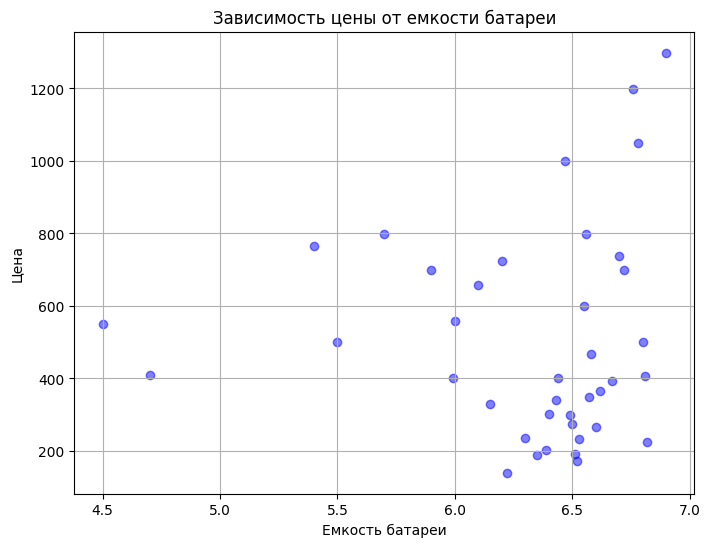

In [107]:
import matplotlib.pyplot as plt

data['Screen Size (inches)']
value = 'Screen Size (inches)'
average_prices = data.groupby(value)['Price ($)'].mean().reset_index()


# Создайте график
plt.figure(figsize=(8, 6))
plt.scatter(average_prices[value], average_prices['Price ($)'], marker='o', color='b', alpha=0.5)
plt.xlabel('Емкость батареи')
plt.ylabel('Цена')
plt.title('Зависимость цены от емкости батареи')
plt.grid(True)

# Покажите график
plt.show()




In [94]:
# Получите код бренда из словаря
brand_name = "Samsung"
brand_code = brand_code_mapping.get(brand_name, -1)  # -1 или другое значение по умолчанию, если бренд не найден

# Выведите код бренда
if brand_code != -1:
    print(f"Код для бренда {brand_name}: {brand_code}")
else:
    print(f"Бренд {brand_name} не найден в словаре.")
# В этом примере мы используем LabelEncoder() для закодирования названий брендов в числовые коды, а затем создаем словарь brand_code_mapping, который сопоставляет названия брендов и их числовые коды. Вы можете использовать этот словарь для обратного отображения (поиска кода бренда по его названию).



Код для бренда Samsung: 12


In [95]:
X = data[selected_columns]  
y = data[target_column]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 23699.537943940522
R-squared: 0.7300458571279869


In [96]:
# TEST PREDICT
brand_name = "Aple"
brand_code = brand_code_mapping.get(brand_name, -1)  # -1 или другое значение по умолчанию, если бренд не найден

print(brand_code)
storage = 128
RAM = 6 
screen_size = 6.7
battery = 4500
x_input = np.array([[brand_code, storage, RAM, screen_size, battery]])
y_result = model.predict(x_input)
print(y_result[0])

0
749.3093898565778


C:\Users\smallaxe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [97]:
for selected_column in selected_columns:
    X = data[selected_column].array.reshape(-1, 1) 
    y = data[target_column]  
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{selected_column} Mean Squared Error:", round(mse,3))
    print(f"{selected_column} R-squared:", round(r2,3))
    print()

Brand_LabelEncoded Mean Squared Error: 72258.163
Brand_LabelEncoded R-squared: 0.177

Storage  Mean Squared Error: 49062.562
Storage  R-squared: 0.441

RAM  Mean Squared Error: 68486.783
RAM  R-squared: 0.22

Screen Size (inches) Mean Squared Error: 91173.052
Screen Size (inches) R-squared: -0.039

Battery Capacity (mAh) Mean Squared Error: 65466.541
Battery Capacity (mAh) R-squared: 0.254



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for selected_column in selected_columns:
    X = data[selected_column].array.reshape(-1, 1) 
    y = data[target_column]  

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)


    # print(np.arange(1, 1001))
    x_test = np.arange(1, 10001).reshape(-1,1)
    y_pred = model.predict(x_test)


    # Создайте график
    plt.figure(figsize=(8, 8))
    plt.plot(x_test, y_pred, label=selected_column)
    plt.xlabel(selected_column)
    plt.ylabel('Price')
    plt.title(selected_column)
    plt.legend()
    plt.grid(True)

    # Покажите график
    plt.show()